In [1]:
import util
import search

In [2]:
# Libraries and code for graph and tree visualization
from graphviz import Graph, Digraph
from IPython.display import display

class search_tree():
    def __init__(self):
        self.graph = Digraph(graph_attr = {'size':'9'})
        
    def addNode(self, name, label):
        self.graph.node(name, label)

    def addEdge(self, source, action, target):
        self.graph.edge(source, target, action)
    
    def getDot(self):
        return self.graph
    
def graphDot(g_prob, color):
    #dot = Graph(graph_attr = {'size':'3.5'})
    dot = Digraph('hola')
    dot.attr(rankdir='LR', size='8,5')
    for node in g_prob.G:
        if not node in color:
            dot.node(node)
        else:
            dot.node(node, style = 'filled', color = color[node])
    for n1 in g_prob.G:
        for n2 in g_prob.G[n1]:
            dot.edge(n1, n2, label=str(g_prob.G[n1][n2]))
            #dot.edge(n2, n1, label=str(g_prob.G[n1][n2]))
    return dot

# Informed Search
## A search problem

In [3]:
class graph_problem(search.SearchProblem):
    def __init__(self, vertices, edges):
        self.G = {v:{} for v in vertices}
        for v1, v2, c in edges1:
            (self.G[v1])[v2] = c
            (self.G[v2])[v1] = c
        self.start = vertices[0]
        self.goal = vertices[-1]
        
    def getStartState(self):
        return self.start

    def isGoalState(self, state):
        return self.goal == state

    def getSuccessors(self, state):
        successors = [(suc, state + '->' + suc, 
                       (self.G[state])[suc]) for suc in self.G[state]]
        return successors


Space-State graph


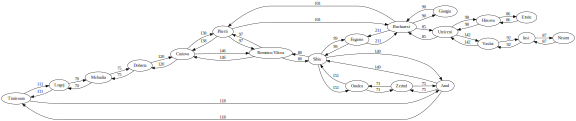

In [4]:
edges1 = [('Arad','Zerind',75), ('Zerind','Oradea',71), ('Oradea','Sibiu',151), ('Arad','Sibiu',140),
          ('Arad','Timisoara',118), ('Timisoara','Lugoj',111), ('Lugoj','Mehadia',70), 
          ('Mehadia','Dobreta',75), ('Dobreta','Craiova',120), ('Craiova','Remnicu Vilcea',146), 
          ('Remnicu Vilcea','Sibiu',80), ('Craiova','Pitesti',138), ('Remnicu Vilcea','Pitesti',97), 
          ('Sibiu','Fagaras',99), ('Fagaras','Bucharest',211), ('Pitesti','Bucharest',101), 
          ('Bucharest','Giurgiu',90), ('Bucharest','Urziceni',85), ('Urziceni','Hirsova',98), 
          ('Hirsova','Eforie',86), ('Urziceni','Vaslui',142), ('Vaslui','Iasi',92),  ('Iasi','Neamt',87)]

vertices1 = ['Arad', 'Craiova', 'Dobreta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 
             'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Remnicu Vilcea', 'Sibiu', 'Timisoara', 
             'Urziceni', 'Vaslui', 'Zerind', 'Bucharest'] 
problem1 = graph_problem(vertices1, edges1)
dot = graphDot(problem1, {})
print "\nSpace-State graph"
display(dot)

In [5]:
def straight_line_heuristic(state):
    distance = [('Arad',366), ('Bucharest',0), ('Craiova',160), ('Dobreta',242), ('Eforie',161), ('Giurgiu',77), ('Hirsova',151), ('Iasi',226),
                ('Lugoj',244), ('Mehadia',241), ('Neamt',234), ('Oradea',380), ('Pitesti',98), ('Remnicu Vilcea', 193), ('Sibiu',253), 
                ('Timisoara',329), ('Urziceni',80), ('Vaslui',199), ('Zerind',374), ('Fagaras',178)]
    hcost = [item[1] for item in distance if item[0] == state][0]
    return hcost

def f_cost_greedy(item, heuristic=straight_line_heuristic):
    return  heuristic(item[0])

def f_cost_aStar(item, heuristic=straight_line_heuristic):
    return item[2] + heuristic(item[0])

In [6]:
def general_search(problem, frontier, f_cost):
    visited = {}
    state = problem.getStartState()
    frontier.push((state, [], 0))
    tree = search_tree()
    tree.addNode(str(state)+"[]",str(state))
    while not frontier.isEmpty():
        u, actions, path_cost = frontier.pop()
        if problem.isGoalState(u):
            return  actions, tree, visited, path_cost
        if not u in visited:            
            for v, action, cost in problem.getSuccessors(u):                
                tree.addNode(str(v) + str(actions+[action]), str(v))
                tree.addEdge(str(u) + str(actions), str(cost), str(v) + str(actions+[action]))
                frontier.push((v, actions + [action], path_cost + cost))
            print "\nExpanding parent node "+u
            print "Fringe: "+ str([frontier.__dict__['heap'][x][2][0] for x in range(len(frontier.__dict__['heap']))])
            print "Cost: " + str([f_cost((frontier.__dict__['heap'][x][2][0],'',frontier.__dict__['heap'][x][2][2]))
                                  for x in range(len(frontier.__dict__['heap']))])
            display(tree.getDot())
        visited[u] = 'black'
    return [], tree, [], -1

## Greedy best-first search

In [7]:
def greedySearch(problem):
    return general_search(problem, util.PriorityQueueWithFunction(f_cost_greedy), f_cost=f_cost_greedy)


Expanding parent node Arad
Fringe: ['Sibiu', 'Zerind', 'Timisoara']
Cost: [253, 374, 329]


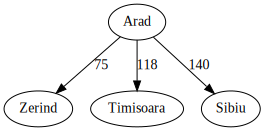


Expanding parent node Sibiu
Fringe: ['Fagaras', 'Remnicu Vilcea', 'Arad', 'Zerind', 'Timisoara', 'Oradea']
Cost: [178, 193, 366, 374, 329, 380]


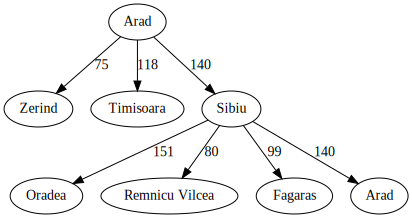


Expanding parent node Fagaras
Fringe: ['Bucharest', 'Timisoara', 'Remnicu Vilcea', 'Zerind', 'Oradea', 'Arad', 'Sibiu']
Cost: [0, 329, 193, 374, 380, 366, 253]


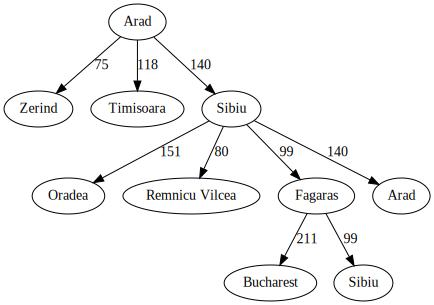

['Arad->Sibiu', 'Sibiu->Fagaras', 'Fagaras->Bucharest']
Estimated cost: 797.0
Actual cost: 450


In [8]:
actions1, tree1, visited1, cost = greedySearch(problem1)
print actions1
est = 0.0
abs = 0.0
for std in visited1:
    est += straight_line_heuristic(std)
print 'Estimated cost: ' + str(est)
print 'Actual cost: ' + str(cost)


## A* search

In [9]:
def aStarSearch(problem):    
    return general_search(problem, util.PriorityQueueWithFunction(f_cost_aStar), f_cost=f_cost_aStar)


Expanding parent node Arad
Fringe: ['Sibiu', 'Zerind', 'Timisoara']
Cost: [393, 449, 447]


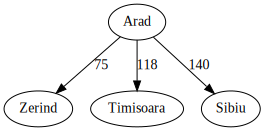


Expanding parent node Sibiu
Fringe: ['Remnicu Vilcea', 'Fagaras', 'Arad', 'Zerind', 'Timisoara', 'Oradea']
Cost: [413, 417, 646, 449, 447, 671]


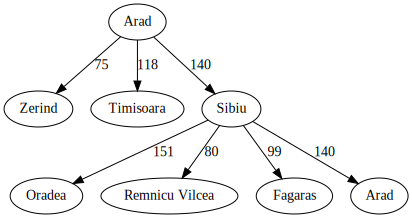


Expanding parent node Remnicu Vilcea
Fringe: ['Pitesti', 'Timisoara', 'Fagaras', 'Zerind', 'Oradea', 'Arad', 'Craiova', 'Sibiu']
Cost: [415, 447, 417, 449, 671, 646, 526, 553]


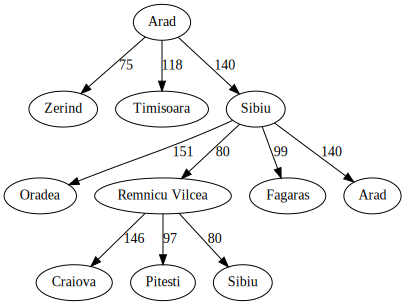


Expanding parent node Pitesti
Fringe: ['Fagaras', 'Bucharest', 'Craiova', 'Zerind', 'Timisoara', 'Arad', 'Sibiu', 'Craiova', 'Remnicu Vilcea', 'Oradea']
Cost: [417, 418, 526, 449, 447, 646, 553, 615, 607, 671]


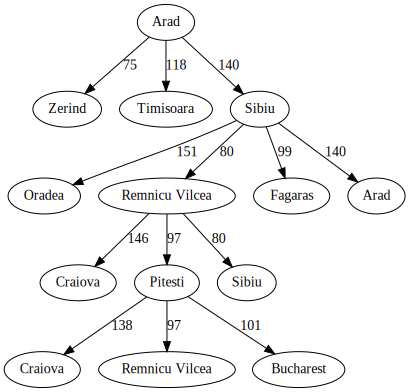


Expanding parent node Fagaras
Fringe: ['Bucharest', 'Timisoara', 'Craiova', 'Zerind', 'Bucharest', 'Arad', 'Sibiu', 'Craiova', 'Remnicu Vilcea', 'Oradea', 'Sibiu']
Cost: [418, 447, 526, 449, 450, 646, 553, 615, 607, 671, 591]


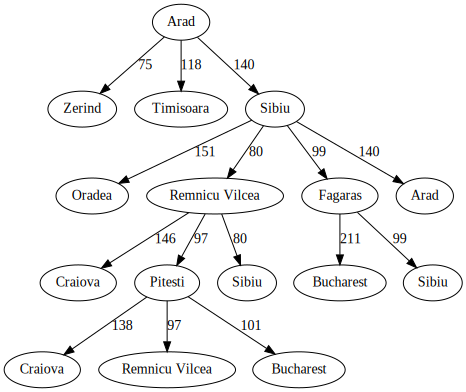

['Arad->Sibiu', 'Sibiu->Remnicu Vilcea', 'Remnicu Vilcea->Pitesti', 'Pitesti->Bucharest']
Path cost: 418


In [10]:
actions2, tree2, visited2, cost = aStarSearch(problem1)
print actions2
print 'Path cost: ' +  str(cost)
